**Task 1**

 (i) how the code is structured
 
The code uses an array to keep track of which students are infected (=2), immune (=0), or susceptible (=1). The allocation of these is random but **fract** controls the number of immune students on day 1, and 1 student is randomly infected. For each day after that, for each infected student a student is selected randomly and if they are susceptible they are infected, however there is also a probability **recovr** that the infected student will become immune. This is carried out for 40 days and repeated 40 times to average the data to increase accuracy. The number of susceptible, infected on that day, as well as the total overall infections on each day is tracked using their own arrays (with lengths of 40 for each day, they are named, data, sdata and tidata respectively). The averages of the data is then obtained by dividing the arrays by **reps**, the number of repetitions. 

(ii) the main for..do loops

The first for loop is for the repetitions of the code to obtain an average, in the array of students is set up with the inital conditions (infected susceptible, or immune). The second one is for each day that the simulation is being run for and calculates the changes each of the three groups. The next main for loop in the range of **numd**, the number of students, where if the student is infected a random student is selected to be infected. Another for loop in the range of the number of students then uses to variable **c** and **s** to find the total infected and susceptible students for that day, which is then added to their respective arrays.



**Task 2**

In [1]:
import numpy as npy
import matplotlib.pyplot as plt

# Defining the basic model as a function with each of the parameters.
def sod(fract = 0.01, recovr = 0.2, numd = 40, num_infect = 1, reps = 40, nums = 1000):
    """ A function to calculate the spread of disease using basic 
        assumptions.
    
    Arguments:
        nums: default =  1000, is the number of students
        fract: default = 0.01, is the fraction of initially immune students
        recovr: default= 0.2, is the chance recovering per day
        num_infect: default = 1, is the number of infected students on the first day
        numd: default = 40, is the number of days in the algorithm
        reps: default = 40, is the number of repeats
        
    Output: 
        data_av: number of infected students on a day, averaged from reps variable
        sdata_av: number of susceptible students on a day, averaged from reps variable
        tidata_av: total number of infections in model, averaged from reps variable
    """
    # array P:0=immune, 1=susceptible, 2=infected
    data = npy.zeros(numd) # array for infected
    sdata = npy.zeros(numd) # array of susceptibles
    tidata = npy.zeros(numd) # array for total infections
    for k in range(0, reps): # loop for repeat calc'n
    # set up P array with values 0, 1, and 2
        remov = 0
        P = npy.zeros(nums) # student array to zero
        for i in range(0, nums): # choose susceptibles
            P[i]=1 # all susceptible

        fn = int(fract*nums) # make into integer
        n = 0
        while n < fn: # exact fract*nums immune
            ra = npy.random.randint(0, nums) #randomly selecting immune students
            if P[ra] != 0: 
                P[ra] = 0
                n = n+1

        n = 0
        while n < 1: #1 infected not one of immune
            ra = npy.random.randint(0, nums) 
            if P[ra] == 1: 
                P[ra] = 2
                n = 1

    # the main part of calculation follows
        for j in range(0, numd): # loop over days
            for i in range(0, nums): # loop students
                if P[i] == 2: #spread infection
                    for ii in range(0, num_infect): 
                        ra = npy.random.randint(0, nums) # infect new student
                        if P[ra] == 1:
                            P[ra]=2
                            remov += 1 # number removed
                            
                if npy.random.rand() < recovr: # chance of recovery 
                    ra = npy.random.randint(0, nums)
                    if P[ra] == 2:
                        P[ra] = 0

            c=0
            s=0
            for i in range(0, nums): # find number infected
                if P[i] == 2:
                    c = c + 1
                if P[i] == 1:
                    s = s + 1

            data[j] = data[j] + c # number of infected students on a day
            sdata[j] = sdata[j] + s # number of susceptible students on a day
            tidata[j] = tidata[j] + remov # total number of infected students 
            
    data_av = data/reps # averages the data for each run
    sdata_av = sdata/reps
    tidata_av = tidata/reps
    
    num_infected = remov*1.0/reps # total number of students infected in 40 days av
    return data_av, sdata_av, tidata_av # returns the averaged data 


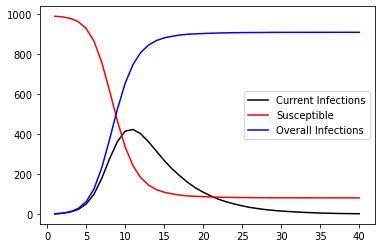

In [2]:
# Putting data in arrays (with general starting parameters given)
data, sdata, tidata = sod() 

# creating an array with each day in to plot against the data from algorithm
days = npy.linspace(1,40,40) 

# plotting data as lines on the same graph
plt.plot(days, data, color = 'black', label = 'Current Infections') 
plt.plot(days, sdata, color = 'red', label = 'Susceptible')
plt.plot(days, tidata, color = 'blue', label = 'Overall Infections')
plt.legend(loc="right") # moving the legend to not obscure the data
plt.show()

ii) The model assumes that there is a 100% chance of being infected if you come in contact with someone infected, in reality this should be appended so that it is a probability. Another assumption in this code is that it assumes each infected student only interacts with one person per day, this should be greater and variable. Also, after recovery each person is assumed to be immune forever, whereas this immunity should reduce with time as the pathogen evolves over time to overcome the immunity. The next assumption is that every student interacts with each other equally whereas it is much more likely that sub groups with more frequent interacts will occur.

**Task 3**

In [3]:
recov_probs = npy.linspace(0.1, 0.9, 4) # creating the values for recovery rate to be tested and plotted 
numd_recovr = 100 # number of days to run the model for 
nums = 1000 # number of students
dur_vals= [] # list for the values of duration to be plotted
prop_vals = [] # list for the values of maximum propagation to be plotted
prop_of_cycle = [] # list for the propagation of infection for each cycle

for l in recov_probs: # loop for each probability of recovery
    
    data, _, _ = sod(recovr = l, numd = numd_recovr) # running the model for the recovery probability

    for i in range(1, numd_recovr):            
        infec_prop = (data[i]-data[i-1])/nums # calculating the change/propagation of infection for each day
        prop_of_cycle.append(infec_prop) # appending the propagation values for each day to a list
    
    prop_vals.append(prop_of_cycle[npy.argmax(prop_of_cycle)]) # appends the maximum propagation of infection to 
    # the list for the max of each recovery probability.
    prop_of_cycle.clear() # clears the list for the next cycle
    
    infec_end = npy.where(data < 1)[0][1] # finding the second value in the data where the infections is 
    # less than 1 (small chance that first value is the first day). This day is taken as the final day and 
    # therfore the duration.  
    dur_vals.append(infec_end) # this is then appended to the list of infection durations for each recovery probability

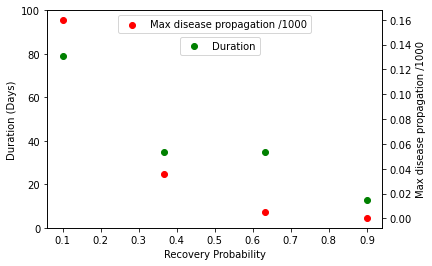

In [4]:
# plotting duration of infection against recovery probability
duration = plt.scatter(recov_probs, dur_vals, color = 'g', label = 'Duration') 
plt.ylim(0, 100) # setting limits to present the data better
plt.legend(bbox_to_anchor=(0.65, 0.9)) # moving the legend to a better location
plt.xlabel('Recovery Probability') # labelling axes
plt.ylabel('Duration (Days)')
plt.twinx() # plotting both lines on same graph
# plotting the maximum propagation against the recocery probability
propagation = plt.scatter(recov_probs, prop_vals, color = 'r', label = 'Max disease propagation /1000')
plt.ylabel('Max disease propagation /1000') # labelling the axis
plt.legend(loc='upper center') # moving the legend to not cover the data
plt.show()

As the recovery probability is increased the maximum propagation of the disease, which is the maximum rate of increase of infected students in the epidemic, decreases following exponential decay. This is because students are recovering quicker meaning that the number of students infected in a day remains lower, and because this is directly proportional to the number of infections in the next day, the maximum disease propagation remains lower. Likewise, as the recovery probability is increased, the duration of infection decreases with a weak linear correlation. This is due to the population becoming immune more quickly as the recovery rate is higher, the reason correlation may not be as strong as expected could possibly be due to the higher recovery rate meaning the rate of infection is slower, this is due to the assumption in the model that 1 student is infected per infected student. It should be noted that this calculation includes randomness so also has some intrinsic variation associated with it.

In [5]:
fract_immune = npy.linspace(0.1, 0.5, 5) # creating the values for fraction of immune students to be tested and plotted 
numd_imm = 100 # number of days to run the model for 
dur_vals2 = [] # list for the values of duration to be plotted
prop_vals2 = [] # list for the values of maximum propagation to be plotted
prop_of_cycle2 = [] # list for the propagation of infection for each cycle

for m in fract_immune: # loop for each fraction of immune students
    data, _, _ = sod(fract = m, numd = numd_imm) # running the model for fraction of immune students
    for i in range(1, numd_imm):
        if data[i] > data[i-1]:
            infec_prop2 = (data[i]-data[i-1])/nums # calculating the change/propagation of infection for each day
            prop_of_cycle2.append(infec_prop2) # appending the propagation values for each day to a list
            
    prop_vals2.append(prop_of_cycle2[npy.argmax(prop_of_cycle2)]) # appends the maximum propagation of infection to 
    # the list for the max of each recovery probability.
    prop_of_cycle2.clear() # clears the list for the next cycle
        
    infec_end2 = npy.where(data < 1)[0][1] # finding the second value in the data where the infections is 
    # less than 1 (small chance that first value is the first day). This day is taken as the final day and 
    # therfore the duration.  
    dur_vals2.append(infec_end2) # this is then appended to the list of infection durations for each recovery probability

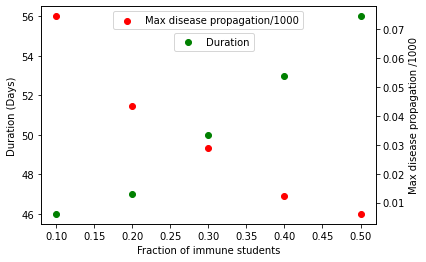

In [6]:
# plotting duration of infection against fraction of immune students
duration = plt.scatter(fract_immune, dur_vals2, color = 'g', label = 'Duration')
plt.legend(bbox_to_anchor=(0.65, 0.9)) # setting limits to present the data better
plt.xlabel('Fraction of immune students') # moving the legend to a better location
plt.ylabel('Duration (Days)') # labelling axes
plt.twinx() # plotting both lines on same graph
# plotting the maximum propagation against the recocery probability
propagation = plt.scatter(fract_immune, prop_vals2, color = 'r', label = 'Max disease propagation/1000')
plt.legend(loc='upper center') # labelling the axis
plt.ylabel('Max disease propagation /1000') # moving the legend to not cover the data
plt.show()

As the fraction of immune students increase, the maximum disease propagation per 1000 students decreases in a linear fashion. This is because there is a smaller population of susceptible students to infect so the peak infections must decrease. As the fraction of immune students increase, the duration of infection increases in an exponential manner. This increase relates to the assumption of the disease model, as the number of infected students equals the number of infections in that day, so with a higher percentage of the population being immune it reduces the chances of infection and therefore takes longer for the disease to spread, and therefore increase the duration of the disease.

**General rules:**
* Both the maximum disease propagation, and the duration of infection decrease with an increasing recovery rate.
* The maximum disease propagation decrease with an increasing fraction of immune students in the population, however the duration of infection increases with it.

**Task 4**

In [7]:
import numpy as npy
import matplotlib.pyplot as plt

# Defining the basic model as a function with each of the parameters.
def sod_reinf(fract = 0.01, recovr = 0.2, numd = 40, num_infect = 1, reps = 40, nums = 1000, reinf = 0):
    """ A function to calculate the spread of disease using basic 
        assumptions.
    
    Arguments:
        nums: default =  1000, is the number of students
        fract: default = 0.01, is the fraction of initially immune students
        recovr: default= 0.2, is the chance recovering per day
        num_infect: default = 1, is the number of infected students on the first day
        numd: default = 40, is the number of days in the algorithm
        reps: default = 40, is the number of repeats
        
    Output: 
        data_av: number of infected students on a day, averaged from reps variable
        sdata_av: number of susceptible students on a day, averaged from reps variable
        tidata_av: total number of infections in model, averaged from reps variable
    """
    # array P:0=immune, 1=susceptible, 2=infected
    data = npy.zeros(numd) # array for infected
    sdata = npy.zeros(numd) # array of susceptibles
    tidata = npy.zeros(numd) # array for total infections
    for k in range(0, reps): # loop for repeat calc'n
    # set up P array with values 0, 1, and 2
        remov = 0
        P = npy.zeros(nums) # student array to zero
        for i in range(0, nums): # choose susceptibles
            P[i]=1 # all susceptible

        fn = int(fract*nums) # make into integer
        n = 0
        while n < fn: # exact fract*nums immune
            ra = npy.random.randint(0, nums) #randomly selecting immune students
            if P[ra] != 0: 
                P[ra] = 0
                n = n+1

        n = 0
        while n < 1: #1 infected not one of immune
            ra = npy.random.randint(0, nums) 
            if P[ra] == 1: 
                P[ra] = 2
                n = 1

    # the main part of calculation follows
        for j in range(0, numd): # loop over days
            for i in range(0, nums): # loop students
                if P[i] == 2: #spread infection
                    for ii in range(0, num_infect): 
                        ra = npy.random.randint(0, nums) # infect new student
                        if P[ra] == 1:
                            P[ra] = 2
                            remov += 1 # number removed
                            
                if npy.random.rand() < recovr: # chance of recovery 
                    ra = npy.random.randint(0, nums)
                    if P[ra] == 2:
                        if npy.random.rand() < reinf:
                            P[ra] = 1
                        else:
                            P[ra] = 0

            c=0
            s=0
            for i in range(0, nums): # find number infected
                if P[i] == 2:
                    c = c + 1
                if P[i] == 1:
                    s = s + 1

            data[j] = data[j] + c # number of infected students on a day
            sdata[j] = sdata[j] + s # number of susceptible students on a day
            tidata[j] = tidata[j] + remov # total number of infected students 
            
    data_av = data/reps # averages the data for each run
    sdata_av = sdata/reps
    tidata_av = tidata/reps
    
    num_infected = remov*1.0/reps # total number of students infected in 40 days av
    return data_av, sdata_av, tidata_av # returns the averaged data 

In [8]:
# same code as last time adapted for varying reinfection probability
numd_reinf = 100
reinf_vals = npy.linspace(0, 0.2, 5)
dur_vals3 = []
prop_vals3 = []
prop_of_cycle3 = []

for k in reinf_vals:
    data_av_reinf, sdata_av_reinf, tidata_av_reinf = sod_reinf(numd = numd_reinf, reinf = k)
    for i in range(1, numd_reinf):
        if data_av_reinf[i] > data_av_reinf[i-1]:
            infec_prop3 = (data_av_reinf[i]-data_av_reinf[i-1])/nums
            prop_of_cycle3.append(infec_prop3)   

    prop_vals3.append(prop_of_cycle3[npy.argmax(prop_of_cycle3)])
    prop_of_cycle3.clear() 
    
    infec_end3 = npy.where(data_av_reinf < 1)[0][1]
    dur_vals3.append(infec_end3)

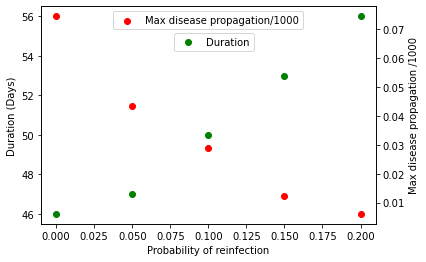

In [9]:
# plotting duration of infection against fraction of immune students
duration = plt.scatter(reinf_vals, dur_vals2, color = 'g', label = 'Duration')
plt.legend(bbox_to_anchor=(0.65, 0.9)) # setting limits to present the data better
plt.xlabel('Probability of reinfection') # moving the legend to a better location
plt.ylabel('Duration (Days)') # labelling axes
plt.twinx() # plotting both lines on same graph
# plotting the maximum propagation against the recocery probability
propagation = plt.scatter(reinf_vals, prop_vals2, color = 'r', label = 'Max disease propagation/1000')
plt.legend(loc='upper center') # labelling the axis
plt.ylabel('Max disease propagation /1000') # moving the legend to not cover the data
plt.show()

Increasing the probability of reinfection causes a linear increase in duration of infection. This is due to the higher the probability, the longer the susceptible population remains high, so infections continue for longer. The effect on maximum propagation of the disease is a linear decrease. This relationship suggests that as the reinfection rate increases of the intitial intensity of the spread of infection is decreased, this idea is quite counterintuitive, so may be caused by an interplay of different parameters such as those measured above (recovery probability and population of susceptible students). 

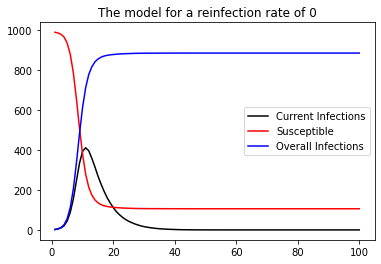

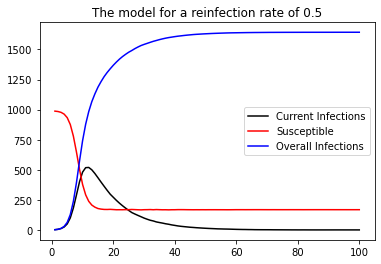

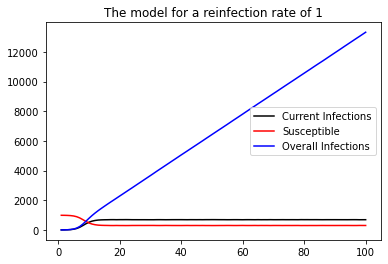

In [10]:
# plotting data for reinfection probabilities of 0.25 and 1
days = npy.linspace(1, 100, 100) # each day to be plotted on the x axis
reinf_values = [0, 0.5, 1] # the values for reinfection to be used in the plot
# titles for the graphs
titles = ['The model for a reinfection rate of 0', 'The model for a reinfection rate of 0.5', 'The model for a reinfection rate of 1']
for x in reinf_values: # loop to plot each disease model for the given reinfection rates
    data, sdata, tidata = sod_reinf(numd = 100, reinf = x) # calculating the disease model
    plt.plot(days, data, color = 'black', label = 'Current Infections') # plotting the data
    plt.plot(days, sdata, color = 'red', label = 'Susceptible')
    plt.plot(days, tidata, color = 'blue', label = 'Overall Infections')
    plt.legend(loc="right") # moving the legend to not block the data
    plt.title(titles[reinf_values.index(x)]) # setting the title
    plt.show()


As expected for reinf = 0 the same graph is shown as for the basic sod() model. for reinf = 0.5, the overall infections have increased due to the susceptible population remaining higher for longer, the duration of the infection lasts much longer and the peak number of infections is higher, however as shown before, the propagation of them is lower. As for reinf = 1, after around 10 days the current number of infections plateaus. This infection continues infinitely as the susceptible population remains the same.

### Self reflection

**Task 1** - The code is intepreted in detail, describing how the model predicts the spread of disease and how parameters are tracked.  **(1/1 mark)**

**Task 2** - The code was implemented successfully into a function so that repeating the model for different values of variables is simple. The total infections, infections and susceptibility for each day were plotted on the same graph and follow the expecetd trend. Multiple assumptions in the model were explained and compared to the what may actually occur. **(3/3 marks)**

**Task 3** - Varying the fraction of immunized students and recovery probability was investigated by measuring the duration of infection and maximum propagation of infection (rate of spread of disease) of the model. These were then plotted on the same graph and the data was described and it was interpreted what may be causing the trends observed.  **(2/2 marks)**

**Task 4** - A new function was produced which takes into account the reinfection probability (probability the student becomes susceptible after infection). The effect of reinfection on duration and maximum disease propagation was plotted for a variety of values.  **(1/1 mark)**

**Quality and Presentation** - All the code was labelled and was largely laid out in an efficient manner, however there is some room for improvement to consolidate the code to investigate a parameter into a function. Graphs were used effectively and sparingly by overlaying multiple plots on the same graphs, however the final 3 graphs could have been layed out in a manner easier to compare.  **(1/2 marks)**

**Bonus Point** - Reasoning for the effect of reinfection on the data was explained and the code was modified to be more appropriate to real life, where the chance of becoming susceptible is not 100%, so the function included the ability to modify this probability, as seen in teh investigation.  **(0.5/1 mark)**

### Total: 8.5/10 marks